In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Exploratory Data Analysis

---

## Uni-Variate Analysis

By performing analysis and visualization, we seek to obtain valuable insights on the dataset and its variables. This may help us better deciding how to help the hotel manage customers who cancel their bookings.

### Initial Analysis of Variables

In [2]:
clean = pd.read_csv('CleanedEDA.csv')
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36160 entries, 0 to 36159
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            36160 non-null  int64  
 1   Booking_ID                            36160 non-null  object 
 2   no_of_adults                          36160 non-null  int64  
 3   no_of_children                        36160 non-null  int64  
 4   no_of_weekend_nights                  36160 non-null  int64  
 5   no_of_week_nights                     36160 non-null  int64  
 6   type_of_meal_plan                     36160 non-null  object 
 7   required_car_parking_space            36160 non-null  int64  
 8   room_type_reserved                    36160 non-null  object 
 9   lead_time                             36160 non-null  int64  
 10  market_segment_type                   36160 non-null  object 
 11  repeated_guest 

Though no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, required_car_parking_space, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, and no_of_special_requests are shown as integer type, upon observation of the data, we can see that these variables consist of a fixed number of groups, making them categorical variables rather than numeric variables. 

Only lead_time and avg_price_per_room are numeric variables with measurable values.

Now, we shall perform uni-variate analysis on each of the variables to gather insights.

---

### Booking Status

Not_Canceled    24284
Canceled        11876
Name: booking_status, dtype: int64


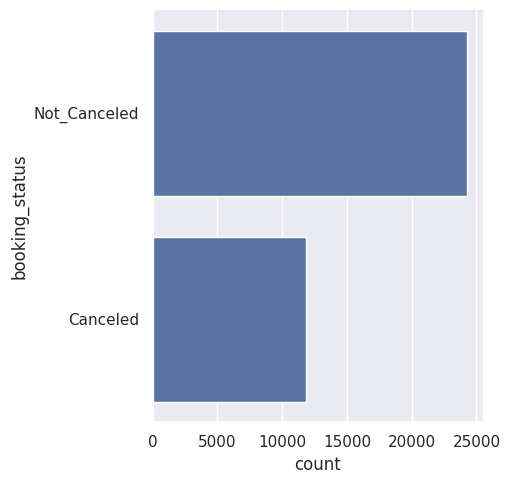

In [3]:
print(clean["booking_status"].value_counts())
sb.catplot(y = "booking_status", data = clean, kind = "count")

There are about twice as many not-canceled bookings (24284) as canceled bookings (11876).

---

### Number of adults and children

2    26044
1     7646
3     2315
0      139
4       16
Name: no_of_adults, dtype: int64
0     33471
1      1613
2      1054
3        19
9         2
10        1
Name: no_of_children, dtype: int64


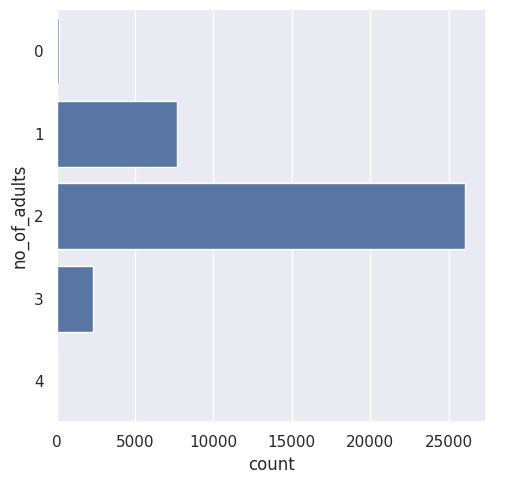

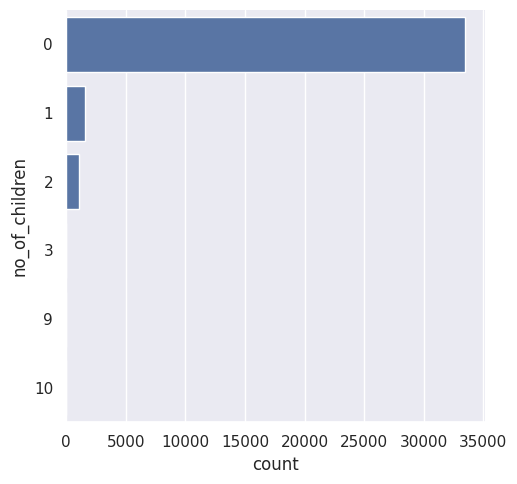

In [4]:
print(clean["no_of_adults"].value_counts())
print(clean["no_of_children"].value_counts())
sb.catplot(y = "no_of_adults", data = clean, kind = "count")
sb.catplot(y = "no_of_children", data = clean, kind = "count")

Looking at the number of adults, most bookings were for 2 adults (26044), followed by 1 adult (7646) then 3 adults (2315). A small number of bookings (fewer than 200 total) involved 0 adults and 4 adults.

On the other hand, for the number of children, a large majority of bookings were for 0 children (33471), with some bookings for 1 child (1613) and 2 children (1054). There were fringe booking cases (fewer than 30 total) of 3 children, 9 children, and 10 children.

---

### Number of weekday and weekend nights

0    16794
1     9959
2     9071
3      152
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64
2     11433
1      9481
3      7829
4      2989
0      2305
5      1611
6       189
7       112
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64


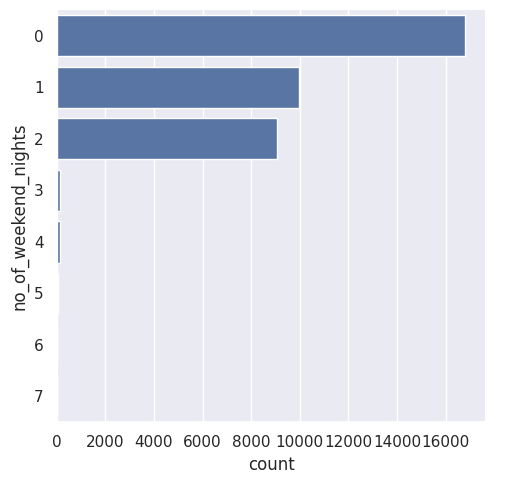

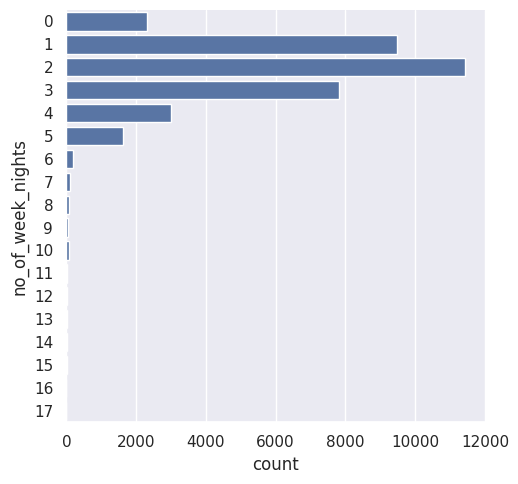

In [5]:
print(clean["no_of_weekend_nights"].value_counts())
print(clean["no_of_week_nights"].value_counts())
sb.catplot(y = "no_of_weekend_nights", data = clean, kind = "count")
sb.catplot(y = "no_of_week_nights", data = clean, kind = "count")

For the number of weekend nights, most bookings were for 0 nights (16794), then a roughly equal number of 1 and 2 night bookings (9959 and 9071 respectively). 

There was a small number of bookings (fewer than 500 total) with 3 to 7 weekend nights. This makes sense as most people tend to stay for the duration of a single weekend at most, which is 2 weekend nights.


As for the number of week nights, the range of possible values is wider, from 0 to 17 week nights. A large proportion of bookings were for 2 nights (11433), followed by 1 night (9481) and 3 nights (7829). There are some bookings with 4 nights (2989), 0 nights (2305), and 5 nights (1611).

There was only a small number of bookings (fewer than 1000 total) with 6 or more week nights. This makes sense since most people tend to stay for a single week at most, which spans 5 week nights, rather than stay multiple weeks for 6 or more week nights.

---

### Meal Plan Types

Meal Plan 1     27745
Not Selected     5113
Meal Plan 2      3297
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64


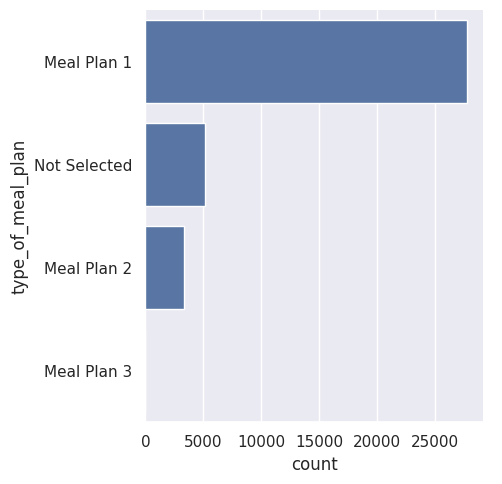

In [6]:
print(clean["type_of_meal_plan"].value_counts())
sb.catplot(y = "type_of_meal_plan", data = clean, kind = "count")

Most bookings chose Meal Plan 1 (27745), followed by bookings which did not select a meal plan (5113), then Meal Plan 2 (3297), and finally just 5 bookings chose Meal Plan 3.

It is likely that Meal Plan 1 is the standard meal choice, with Meal Plans 2 and 3 catering to people with allergies or are vegetarian/vegan.

---

### Parking Space Required

0    35039
1     1121
Name: required_car_parking_space, dtype: int64


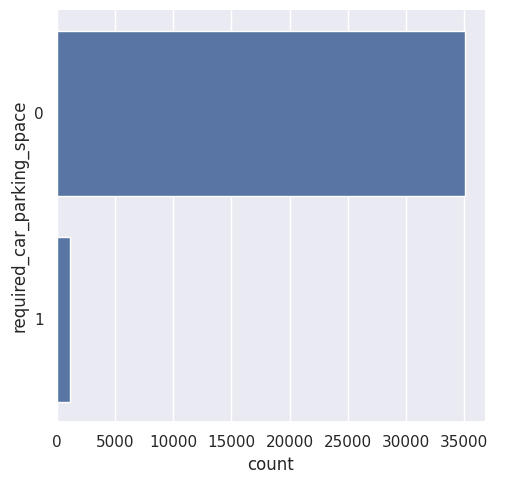

In [7]:
print(clean["required_car_parking_space"].value_counts())
sb.catplot(y = "required_car_parking_space", data = clean, kind = "count")

A vast majority of bookings did not require car parking space (35039), with only 1121 bookings needing car parking space. This may indicate that the hotel is easily accessible by public transport or other non-car transport.

---

### Room Type Reserved

Room_Type 1    28041
Room_Type 4     6040
Room_Type 6      962
Room_Type 2      690
Room_Type 5      263
Room_Type 7      157
Room_Type 3        7
Name: room_type_reserved, dtype: int64


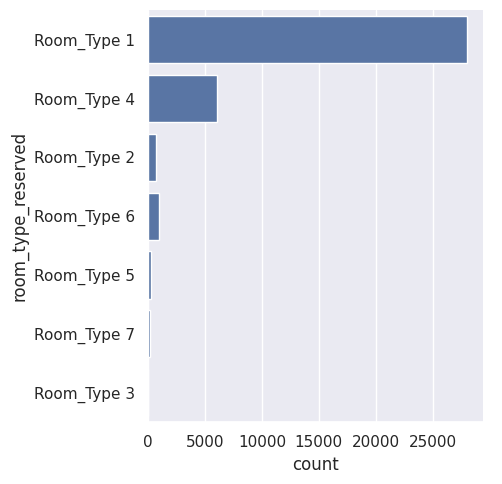

In [8]:
print(clean["room_type_reserved"].value_counts())
sb.catplot(y = "room_type_reserved", data = clean, kind = "count")

Most bookings (28041) reserved room type 1, which suggests that it is the standard hotel room which the hotel has the most of. 6040 bookings reserved room type 4, which may be a larger room catering to larger families. The other room types have fewer than 1000 bookings each, which could indicate that they are luxury room types such as deluxe rooms and suites.

---

### Lead Time

This refers to the number of days in advance the booking was made.

<Axes: xlabel='lead_time'>

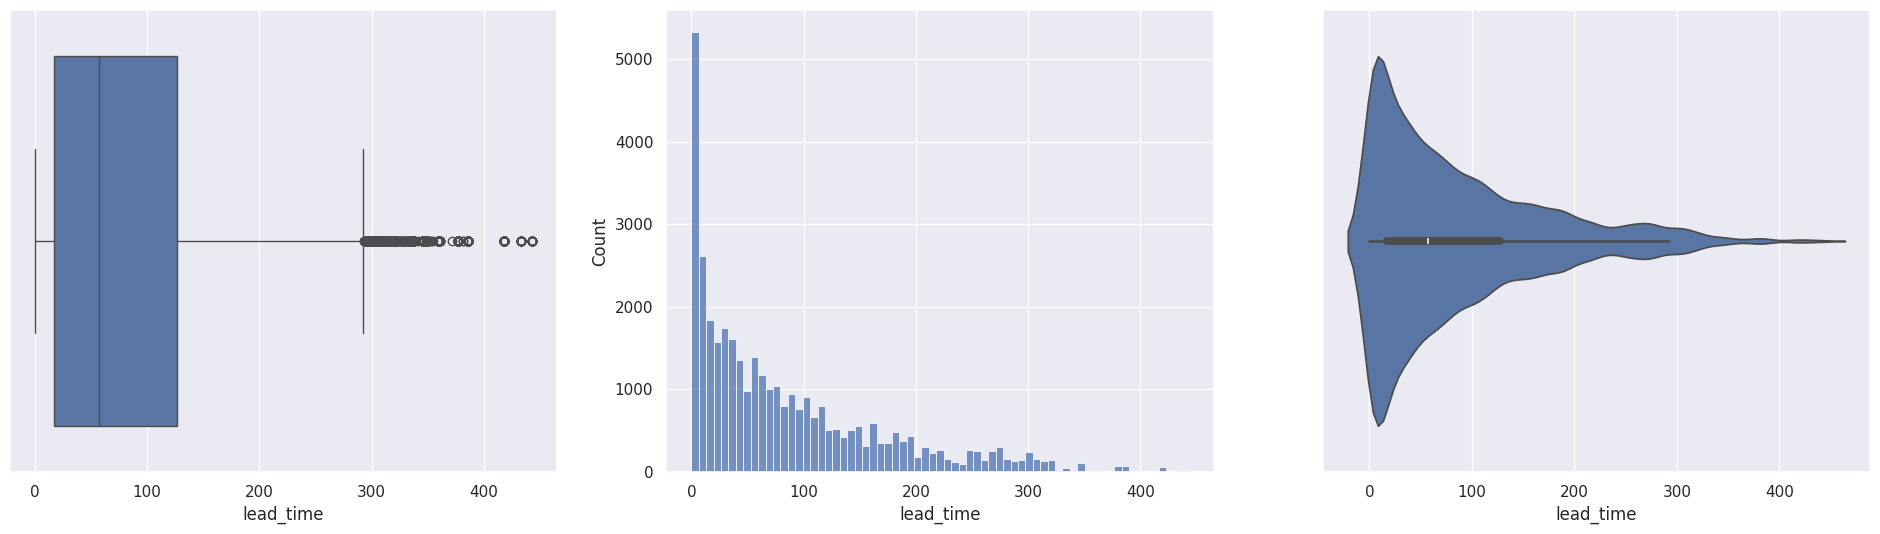

In [9]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))

sb.boxplot(data = clean["lead_time"], orient = "h", ax = axes[0])
sb.histplot(data = clean["lead_time"], ax = axes[1])
sb.violinplot(data = clean["lead_time"], orient = "h", ax = axes[2])

In [10]:
print(clean["lead_time"].mean())
print(clean["lead_time"].median())

85.35663716814159
57.0


The mean number of days in advance which bookings are made is around 85. On the other hand, the median number of days in advance which bookings are made is 57.

This suggests that there is a small number of bookings made many days in advance causing the mean to be much greater than the median, creating a right-skewed graph as seen above.

---

### Market Segment Type

This refers to where and how the booking was done.

Online           23129
Offline          10518
Corporate         2011
Complementary      377
Aviation           125
Name: market_segment_type, dtype: int64


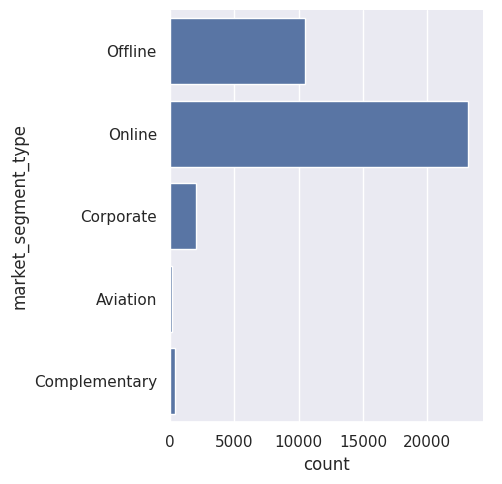

In [11]:
print(clean["market_segment_type"].value_counts())
sb.catplot(y = "market_segment_type", data = clean, kind = "count")

Most bookings are online (23129), while slightly less than half that number are offline bookings (10518). There are some corporate bookings (2011), and very few complementary and aviation bookings (fewer than 1000 combined). This hotel seems to get most of its bookings from online booking websites.

---

### Repeated Guest

0    35238
1      922
Name: repeated_guest, dtype: int64


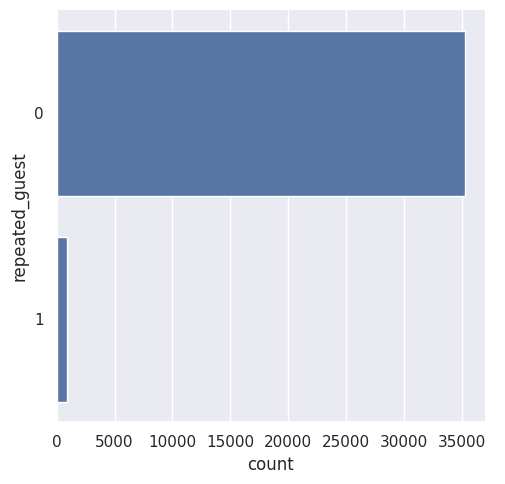

In [12]:
print(clean["repeated_guest"].value_counts())
sb.catplot(y = "repeated_guest", data = clean, kind = "count")

The vast majority of the hotel's bookings are new guests (35238), while only 922 bookings are from repeat guests who previously stayed at the hotel. People do not seem to repeatedly book with this hotel. This may be because the hotel receives mostly tourists who visit only once for a period of time and do not return again.

---

### Number of Previous Cancellations and Bookings not Cancelled

0     35824
1       196
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64
0     35355
1       225
2       112
3        79
4        65
5        59
6        36
7        24
8        23
9        19
10       18
11       14
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: no_of_previous_bookings_not_canceled, dtype: int64


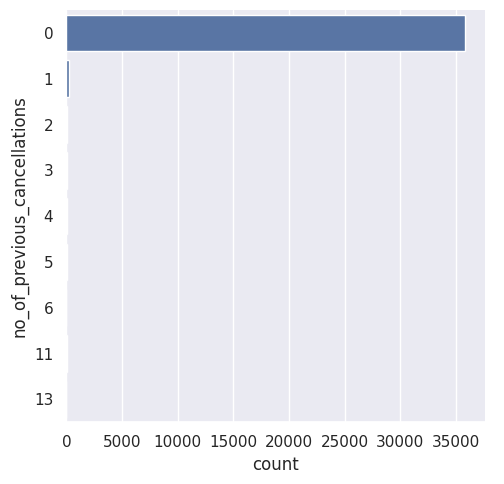

In [13]:
print(clean["no_of_previous_cancellations"].value_counts())
sb.catplot(y = "no_of_previous_cancellations", data = clean, kind = "count")
print(clean["no_of_previous_bookings_not_canceled"].value_counts())

The vast majority of bookings (35824) come from customers who have never cancelled before. Only a small number of bookings (fewer than 500) are from customers who have cancelled before.

The vast majority of bookings (35355) also come from customers who have never made previous bookings and not cancelled. Only a small number of bookings (fewer than 1000) are from customers who have made previous bookings and not cancelled before.

This shows that most customers who make bookings are completely new to the hotel.

---

### Average Price per room

<Axes: xlabel='avg_price_per_room'>

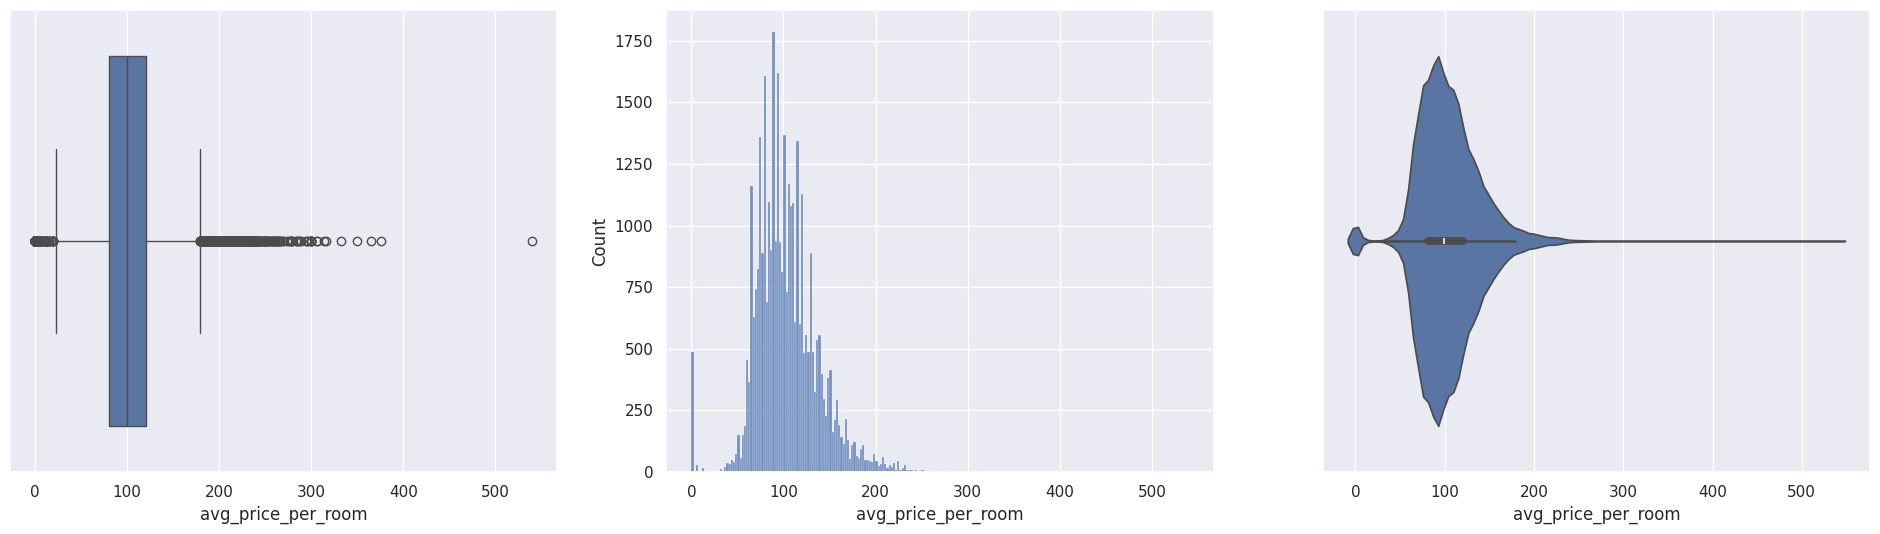

In [14]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))

sb.boxplot(data = clean["avg_price_per_room"], orient = "h", ax = axes[0])
sb.histplot(data = clean["avg_price_per_room"], ax = axes[1])
sb.violinplot(data = clean["avg_price_per_room"], orient = "h", ax = axes[2])

In [15]:
print(clean["avg_price_per_room"].mean())
print(clean["avg_price_per_room"].median())

103.66038163716814
99.67500000000001


The mean price of a room is around 104 dollars per night. The median price of a room is around 100 dollars per night.

The two values are relatively similar, possibly indicating fewer outliers.

---

### Number of special requests

0    19717
1    11329
2     4354
3      674
4       78
5        8
Name: no_of_special_requests, dtype: int64


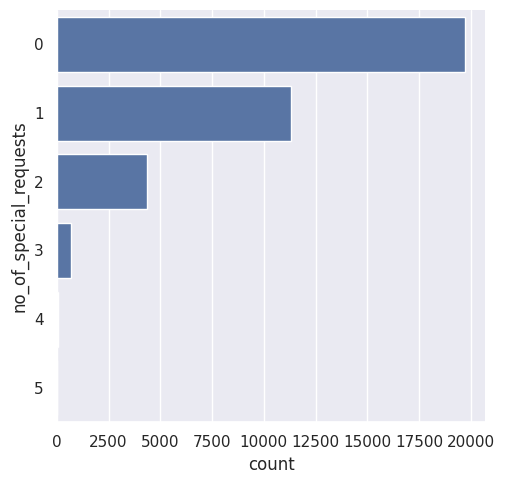

In [16]:
print(clean["no_of_special_requests"].value_counts())
sb.catplot(y = "no_of_special_requests", data = clean, kind = "count")

A majority of bookings come with no special requests (19717), followed by 1 special request (11329) and 2 special requests (4354). For 3 - 5 special requests, there are fewer than 1000 bookings in total.

Most people don't really have special requests for the hotel, or maybe just one or two. Any more than that is rare.

---

## Multi-Variate Analysis

By performing multi-variate analysis, we can discover relationships between booking status and other variables, in order to make better informed decisions regarding machine learning.

---

### Booking Status and Number of Previous Cancellations

These two variables have already been explored individually. As they are both categorical variables, we shall use a heatmap to visualize their relationship.

Not_Canceled    24284
Canceled        11876
Name: booking_status, dtype: int64


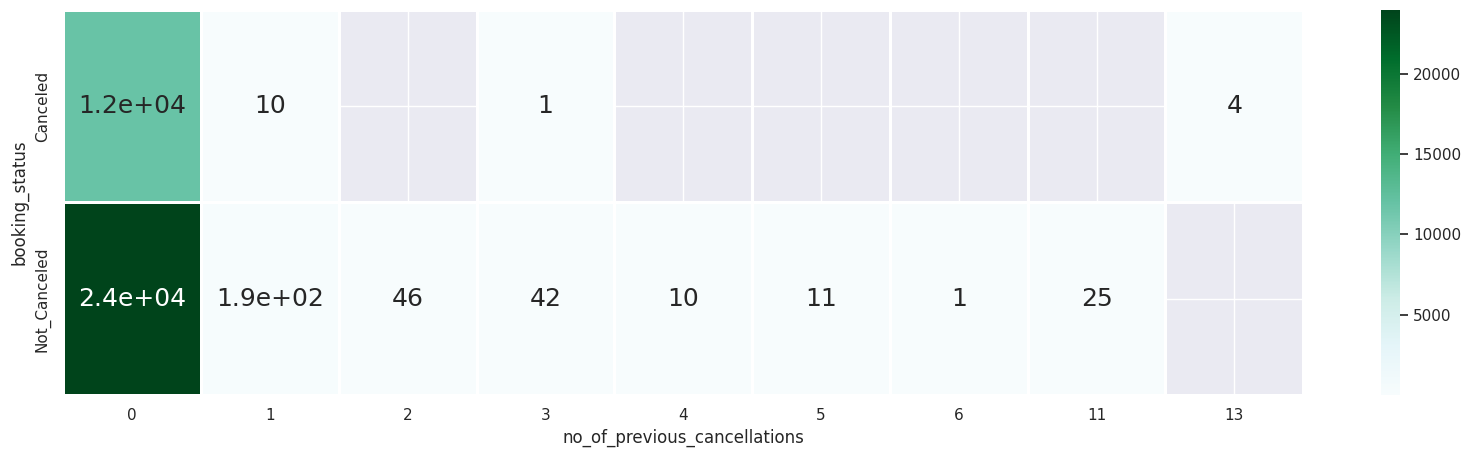

In [17]:
# Heatmap of the two variables

f = plt.figure(figsize=(20, 5))
sb.heatmap(clean.groupby(['booking_status', 'no_of_previous_cancellations']).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")
print(clean["booking_status"].value_counts())

In [18]:
value0 = len(clean[(clean["booking_status"] == "Canceled") & (clean["no_of_previous_cancellations"] == 0)])
value1 = len(clean[(clean["booking_status"] == "Not_Canceled") & (clean["no_of_previous_cancellations"] == 0)])
value2 = len(clean[(clean["booking_status"] == "Not_Canceled") & (clean["no_of_previous_cancellations"] == 1)])


print("Number of bookings canceled with no previous cancellation:", value0)
print("Number of bookings not canceled with no previous cancellation:", value1)
print("Number of bookings not canceled with one previous cancellation:", value2)

Number of bookings canceled with no previous cancellation: 11861
Number of bookings not canceled with no previous cancellation: 23963
Number of bookings not canceled with one previous cancellation: 186


For bookings with no previous cancellations, the ratio of canceled to not canceled (11861/23963, about 0.4950) seems to be slightly higher than the booking status ratio (11876/24284, about 0.4890).

However, for bookings with at least one previous cancellation, there are (10 + 1 + 4) = 15 canceled bookings and (186 + 46 + 42 + 10 + 11 + 1 + 25) = 321 bookings not canceled. This is a ratio of 15/321, about 0.04673. This is clearly much lower than the booking status ratio.

This suggests that people who have previously canceled their bookings before are less likely to cancel them again, compared to those who have never canceled before.

---

## Booking Status and Lead Time

Since booking status is a categorical variable while lead time is a numeric variable, we used a boxplot and violinplot to visualize their relationship.

<Axes: xlabel='booking_status', ylabel='lead_time'>

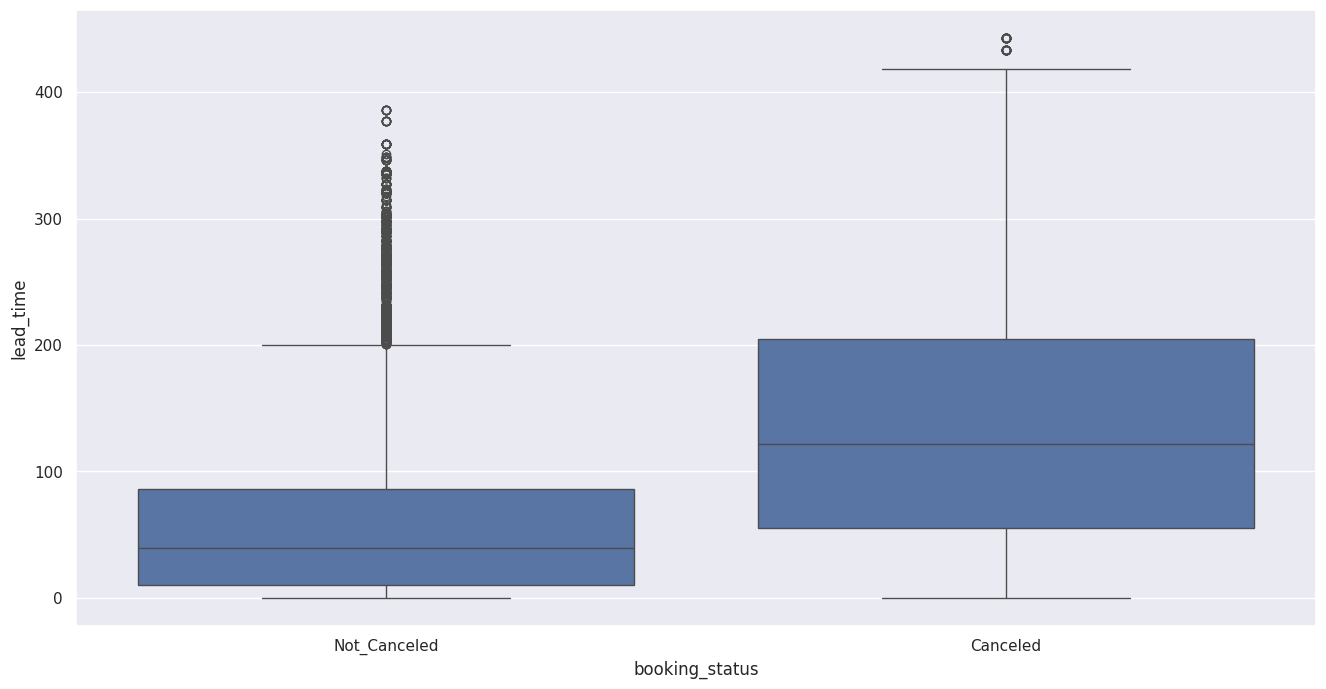

In [19]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = clean, x = "booking_status", y = "lead_time")

In [20]:
clean.groupby("booking_status")["lead_time"].describe()

,count,mean,std,min,25%,50%,75%,max
booking_status,,,,,,,,
Canceled,11876.0,139.248905,98.951082,0.0,55.0,122.0,205.0,443.0
Not_Canceled,24284.0,59.000824,64.027506,0.0,10.0,39.0,86.0,386.0


From the boxplot and table, we can see that canceled bookings had a greater median lead time (122) than bookings that were not canceled (39). This could be because issues are more likely to come up within the longer lead time period, which would require a cancellation (e.g. family matter, sudden work).

In addition, 50% of uncanceled bookings had lead times ranging from 10 to 86 days, while 50% of canceled bookings had lead times ranging from 55 to 205 days, showing a more spread out range of lead time for canceled bookings compared to uncanceled bookings. This can be seen from the boxplot as well.

<Axes: xlabel='lead_time', ylabel='booking_status'>

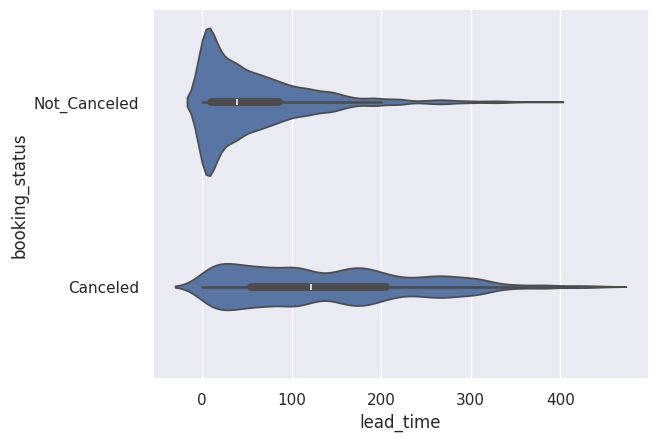

In [21]:
sb.violinplot(data = clean, x = "lead_time", y = "booking_status", orient = "h")

The violinplot also shows that canceled bookings had their lead times more spread out with longer lead times, while uncanceled bookings had lead times aggregating closer to the left of the plot (shorter lead times). This further supports the idea that the further the booking date from the actual stay, the more likely the booking would be cancelled.